In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction import text
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Want to use NLP techniques and maybe some other stuff I can think of
this will not include deep learning stuff

In [3]:
ign_df = pd.read_pickle('ign_data/ign_data_pass_two.pkl')
ign_df.head()

links  \
1  https://www.ign.com/articles/2011/07/19/warham...   
2  https://www.ign.com/articles/2011/07/20/call-o...   
3  https://www.ign.com/articles/2011/07/20/captai...   
4  https://www.ign.com/articles/2011/07/20/quiz-c...   
5  https://www.ign.com/articles/2011/07/20/limbo-...   

                                   rough_review_body  \
1  \u003csection class=\"article-page\"\u003e\u00...   
2  \u003csection class=\"article-page\"\u003eThe ...   
3  \u003csection class=\"article-page\"\u003eThe ...   
4  \u003csection class=\"article-page\"\u003e\u00...   
5  \u003csection class=\"article-page\"\u003eVide...   

                                 cleaned_review_body  \
1     'Warhammer 40K: Kill Team might be unfortun...   
2   The Call of Juarez franchise always intereste...   
3   The majority of movie games are just awful. S...   
4     'Quiz Climber, from Buzz! developer   'Rele...   
5   Video games are an art form made up of visual...   

                                review_summary_rough review_score  \
1  "And \"also-ran\" hangs all over Warhammer 40K...          6.5   
2  "Call of Juarez: The Cartel is a poor change o...          4.5   
3  "Captain America: Super Soldier is a mediocre ...          5.5   
4  "Ultimately, Quiz Climber is just a little too...          6.5   
5  "Limbo is an incredible achievement. Very few ...            9   

                                                tags  \
1  :["review","blogroll","event-essentials","hot"...   
2  :["review","blogroll","call-of-juarez-the-cart...   
3  :["review","blogroll","legacy","wii","games","...   
4  :["review","blogroll","games","legacy","wirele...   
5  :["review","games","legacy","limbo","platforme...   

                               categories             modified_date  \
1  :["ign","ps3","xbox-360","xbox-live"],  2011-10-18T05:59:32+0000   
2         :["ign","pc","ps3","xbox-360"],  2011-10-18T06:02:02+0000   
3                         :["ign","wii"],  2011-10-18T06:02:20+0000   
4                    :["ign","wireless"],  2011-10-18T06:07:06+0000   
5                          :["pc","ps3"],  2011-10-18T06:07:21+0000   

             published_date         author_name  \
1  2011-07-19T19:47:00+0000       "Arthur Gies"   
2  2011-07-20T00:14:00+0000  "Anthony Gallegos"   
3  2011-07-20T00:43:00+0000      "Audrey Drake"   
4  2011-07-20T21:44:00+0000      "Justin Davis"   
5  2011-07-20T22:29:00+0000   "Daemon Hatfield"   

                                            tag_list  \
1  [review, blogroll, event-essentials, hot, lega...   
2  [review, blogroll, call-of-juarez-the-cartel, ...   
3  [review, blogroll, legacy, wii, games, captain...   
4  [review, blogroll, games, legacy, wireless, qu...   
5  [review, games, legacy, limbo, platformer, pla...   

                     categories_list  \
1  [ign, ps3, xbox-360, xbox-live, ]   
2         [ign, pc, ps3, xbox-360, ]   
3                       [ign, wii, ]   
4                  [ign, wireless, ]   
5                        [pc, ps3, ]   

                                  review_title  \
1            "Warhammer 40K: Kill Team Review"   
2          "Call of Juarez: The Cartel Review"   
3  "Captain America: Super Soldier Wii Review"   
4                        "Quiz Climber Review"   
5                               "Limbo Review"   

                                  review_body_corpus  review_score_float  \
1     warhammer 40k kill team might be unfortunat...                 6.5   
2   the call of juarez franchise always intereste...                 4.5   
3   the majority of movie games are just awful st...                 5.5   
4     quiz climber from buzz developer   relentle...                 6.5   
5   video games are an art form made up of visual...                 9.0   

   number_character_review  number_words_review  
1                     3705                  642  
2                     3770                  648  
3                     2675                  474  
4             

In [4]:
print(type(ign_df['review_score_float'].loc[1]))
# remove duplicated rows if any exist
test_df = ign_df[ign_df.duplicated(['cleaned_review_body'])]
ign_df = ign_df[~ign_df.duplicated(['cleaned_review_body'])]
# print(test_df.shape)
# test_df.head()

# ign_df.duplicated(['cleaned_review_body'])
# ~(ign_df['review_score_float']==10.0)
print(ign_df.shape)
ign_df.head()

<class 'numpy.float64'>
(11072, 17)


links  \
1  https://www.ign.com/articles/2011/07/19/warham...   
2  https://www.ign.com/articles/2011/07/20/call-o...   
3  https://www.ign.com/articles/2011/07/20/captai...   
4  https://www.ign.com/articles/2011/07/20/quiz-c...   
5  https://www.ign.com/articles/2011/07/20/limbo-...   

                                   rough_review_body  \
1  \u003csection class=\"article-page\"\u003e\u00...   
2  \u003csection class=\"article-page\"\u003eThe ...   
3  \u003csection class=\"article-page\"\u003eThe ...   
4  \u003csection class=\"article-page\"\u003e\u00...   
5  \u003csection class=\"article-page\"\u003eVide...   

                                 cleaned_review_body  \
1     'Warhammer 40K: Kill Team might be unfortun...   
2   The Call of Juarez franchise always intereste...   
3   The majority of movie games are just awful. S...   
4     'Quiz Climber, from Buzz! developer   'Rele...   
5   Video games are an art form made up of visual...   

                                review_summary_rough review_score  \
1  "And \"also-ran\" hangs all over Warhammer 40K...          6.5   
2  "Call of Juarez: The Cartel is a poor change o...          4.5   
3  "Captain America: Super Soldier is a mediocre ...          5.5   
4  "Ultimately, Quiz Climber is just a little too...          6.5   
5  "Limbo is an incredible achievement. Very few ...            9   

                                                tags  \
1  :["review","blogroll","event-essentials","hot"...   
2  :["review","blogroll","call-of-juarez-the-cart...   
3  :["review","blogroll","legacy","wii","games","...   
4  :["review","blogroll","games","legacy","wirele...   
5  :["review","games","legacy","limbo","platforme...   

                               categories             modified_date  \
1  :["ign","ps3","xbox-360","xbox-live"],  2011-10-18T05:59:32+0000   
2         :["ign","pc","ps3","xbox-360"],  2011-10-18T06:02:02+0000   
3                         :["ign","wii"],  2011-10-18T06:02:20+0000   
4                    :["ign","wireless"],  2011-10-18T06:07:06+0000   
5                          :["pc","ps3"],  2011-10-18T06:07:21+0000   

             published_date         author_name  \
1  2011-07-19T19:47:00+0000       "Arthur Gies"   
2  2011-07-20T00:14:00+0000  "Anthony Gallegos"   
3  2011-07-20T00:43:00+0000      "Audrey Drake"   
4  2011-07-20T21:44:00+0000      "Justin Davis"   
5  2011-07-20T22:29:00+0000   "Daemon Hatfield"   

                                            tag_list  \
1  [review, blogroll, event-essentials, hot, lega...   
2  [review, blogroll, call-of-juarez-the-cartel, ...   
3  [review, blogroll, legacy, wii, games, captain...   
4  [review, blogroll, games, legacy, wireless, qu...   
5  [review, games, legacy, limbo, platformer, pla...   

                     categories_list  \
1  [ign, ps3, xbox-360, xbox-live, ]   
2         [ign, pc, ps3, xbox-360, ]   
3                       [ign, wii, ]   
4                  [ign, wireless, ]   
5                        [pc, ps3, ]   

                                  review_title  \
1            "Warhammer 40K: Kill Team Review"   
2          "Call of Juarez: The Cartel Review"   
3  "Captain America: Super Soldier Wii Review"   
4                        "Quiz Climber Review"   
5                               "Limbo Review"   

                                  review_body_corpus  review_score_float  \
1     warhammer 40k kill team might be unfortunat...                 6.5   
2   the call of juarez franchise always intereste...                 4.5   
3   the majority of movie games are just awful st...                 5.5   
4     quiz climber from buzz developer   relentle...                 6.5   
5   video games are an art form made up of visual...                 9.0   

   number_character_review  number_words_review  
1                     3705                  642  
2                     3770                  648  
3                     2675                  474  
4             

In [5]:
# note, TextBlob has a default analyzer, can change that to see how results change
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

ign_df['polarity'] = ign_df['review_body_corpus'].apply(pol)
ign_df['subjectivity'] = ign_df['review_body_corpus'].apply(sub)
ign_df.head()

links  \
1  https://www.ign.com/articles/2011/07/19/warham...   
2  https://www.ign.com/articles/2011/07/20/call-o...   
3  https://www.ign.com/articles/2011/07/20/captai...   
4  https://www.ign.com/articles/2011/07/20/quiz-c...   
5  https://www.ign.com/articles/2011/07/20/limbo-...   

                                   rough_review_body  \
1  \u003csection class=\"article-page\"\u003e\u00...   
2  \u003csection class=\"article-page\"\u003eThe ...   
3  \u003csection class=\"article-page\"\u003eThe ...   
4  \u003csection class=\"article-page\"\u003e\u00...   
5  \u003csection class=\"article-page\"\u003eVide...   

                                 cleaned_review_body  \
1     'Warhammer 40K: Kill Team might be unfortun...   
2   The Call of Juarez franchise always intereste...   
3   The majority of movie games are just awful. S...   
4     'Quiz Climber, from Buzz! developer   'Rele...   
5   Video games are an art form made up of visual...   

                                review_summary_rough review_score  \
1  "And \"also-ran\" hangs all over Warhammer 40K...          6.5   
2  "Call of Juarez: The Cartel is a poor change o...          4.5   
3  "Captain America: Super Soldier is a mediocre ...          5.5   
4  "Ultimately, Quiz Climber is just a little too...          6.5   
5  "Limbo is an incredible achievement. Very few ...            9   

                                                tags  \
1  :["review","blogroll","event-essentials","hot"...   
2  :["review","blogroll","call-of-juarez-the-cart...   
3  :["review","blogroll","legacy","wii","games","...   
4  :["review","blogroll","games","legacy","wirele...   
5  :["review","games","legacy","limbo","platforme...   

                               categories             modified_date  \
1  :["ign","ps3","xbox-360","xbox-live"],  2011-10-18T05:59:32+0000   
2         :["ign","pc","ps3","xbox-360"],  2011-10-18T06:02:02+0000   
3                         :["ign","wii"],  2011-10-18T06:02:20+0000   
4                    :["ign","wireless"],  2011-10-18T06:07:06+0000   
5                          :["pc","ps3"],  2011-10-18T06:07:21+0000   

             published_date         author_name  \
1  2011-07-19T19:47:00+0000       "Arthur Gies"   
2  2011-07-20T00:14:00+0000  "Anthony Gallegos"   
3  2011-07-20T00:43:00+0000      "Audrey Drake"   
4  2011-07-20T21:44:00+0000      "Justin Davis"   
5  2011-07-20T22:29:00+0000   "Daemon Hatfield"   

                                            tag_list  \
1  [review, blogroll, event-essentials, hot, lega...   
2  [review, blogroll, call-of-juarez-the-cartel, ...   
3  [review, blogroll, legacy, wii, games, captain...   
4  [review, blogroll, games, legacy, wireless, qu...   
5  [review, games, legacy, limbo, platformer, pla...   

                     categories_list  \
1  [ign, ps3, xbox-360, xbox-live, ]   
2         [ign, pc, ps3, xbox-360, ]   
3                       [ign, wii, ]   
4                  [ign, wireless, ]   
5                        [pc, ps3, ]   

                                  review_title  \
1            "Warhammer 40K: Kill Team Review"   
2          "Call of Juarez: The Cartel Review"   
3  "Captain America: Super Soldier Wii Review"   
4                        "Quiz Climber Review"   
5                               "Limbo Review"   

                                  review_body_corpus  review_score_float  \
1     warhammer 40k kill team might be unfortunat...                 6.5   
2   the call of juarez franchise always intereste...                 4.5   
3   the majority of movie games are just awful st...                 5.5   
4     quiz climber from buzz developer   relentle...                 6.5   
5   video games are an art form made up of visual...                 9.0   

   number_character_review  number_words_review  polarity  subjectivity  
1                     3705                  642  0.062923      0.433371  
2                     3770                  648 -0.016471      0.4

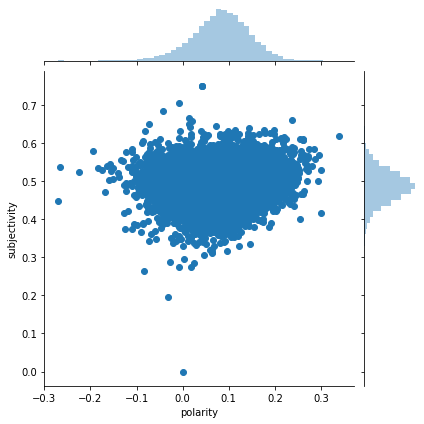

In [6]:
photo_dir = 'project_notes_or_data/photos_for_presentation/'
sns.jointplot(x='polarity', y='subjectivity', data=ign_df)
plt.savefig(photo_dir+'polarity_subjectivity_scatter.jpg', dpi=200)
plt.show()

In [7]:
sns.jointplot(x='polarity', y='subjectivity', data=ign_df, kind='kde')
plt.savefig(photo_dir+'polarity_subjectivity_heat.jpg', dpi=200)
plt.show()

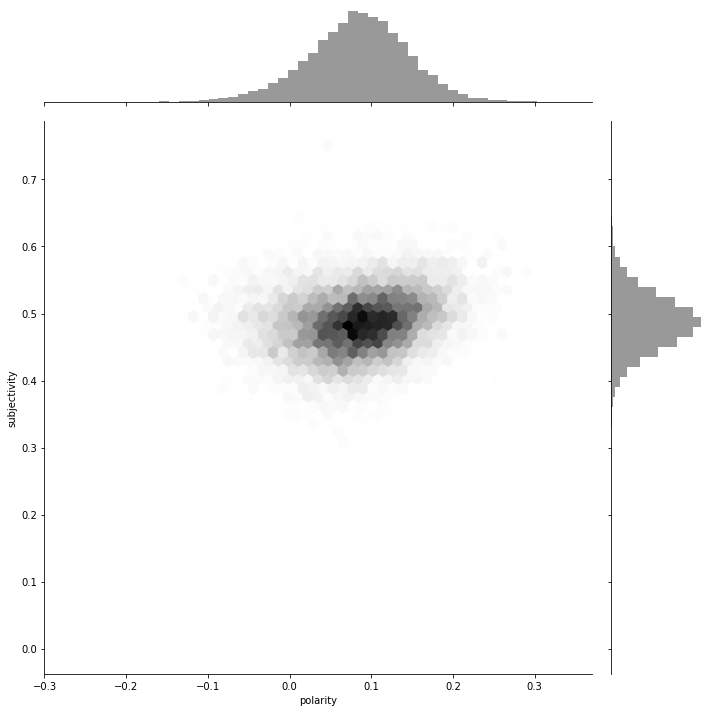

In [8]:
sns.jointplot(x='polarity', y='subjectivity', data=ign_df, 
              kind='hex', color='k', height=10)
plt.savefig(photo_dir+'polarity_subjectivity_hex.jpg', dpi=200)
plt.show()

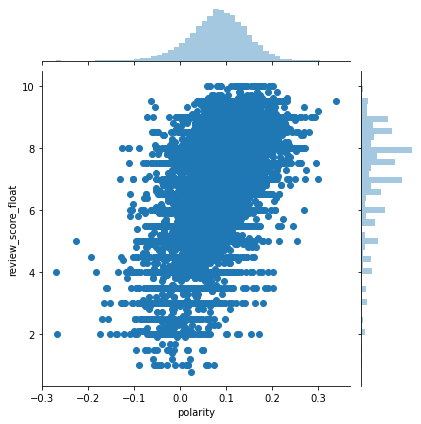

In [9]:
sns.jointplot(x='polarity', y='review_score_float', data=ign_df)
plt.savefig(photo_dir+'review_score_polarity.jpg', dpi=200)
plt.show()

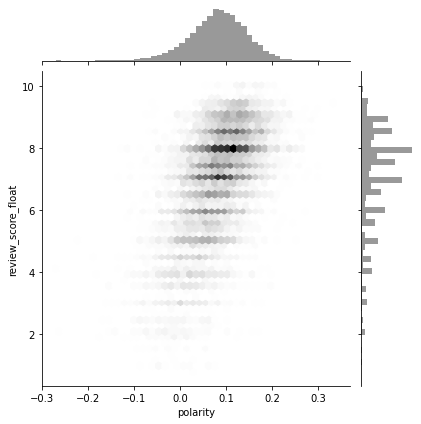

0.543861051482053


In [10]:
sns.jointplot(x='polarity', y='review_score_float', data=ign_df, kind='hex', color='k', gridsize=45)
plt.savefig(photo_dir+'review_score_polarity_hex.jpg', dpi=200)
plt.show()

# find the correlation
col1 = ign_df['polarity']
col2 = ign_df['review_score_float']
polarity_review_correlation = col1.corr(col2)
print(polarity_review_correlation)

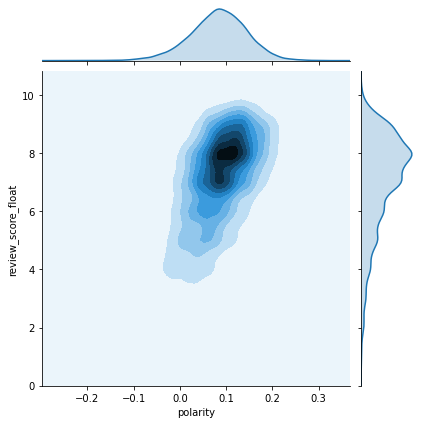

In [11]:
sns.jointplot(x='polarity', y='review_score_float', data=ign_df, kind='kde')
plt.savefig(photo_dir+'review_score_polarity_heat.jpg', dpi=200)
plt.show()

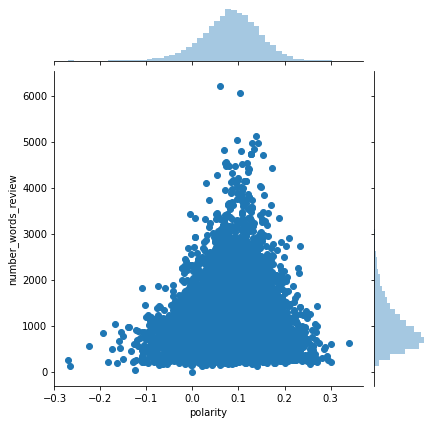

0.1029534274598527


In [12]:
sns.jointplot(x='polarity', y='number_words_review', data=ign_df)
plt.savefig(photo_dir+'number_words_polarity_scatter.jpg', dpi=200)
plt.show()
col1 = ign_df['polarity']
col2 = ign_df['number_words_review']
polarity_number_correlation = col1.corr(col2)
print(polarity_number_correlation)

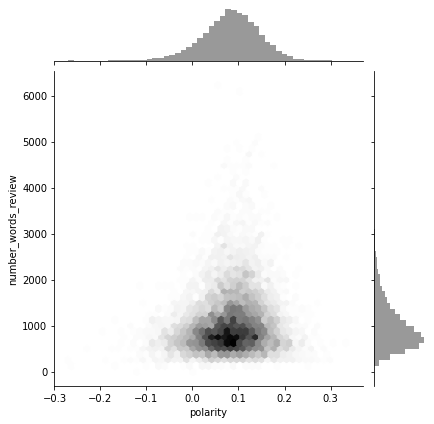

In [13]:
sns.jointplot(x='polarity', y='number_words_review', data=ign_df, kind='hex', color='k', gridsize=45)
plt.savefig(photo_dir+'number_words_polarity_hex.jpg', dpi=200)
plt.show()

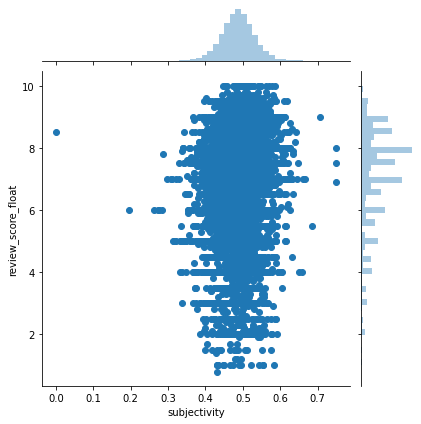

0.10901284189367653


In [14]:
sns.jointplot(x='subjectivity', y='review_score_float', data=ign_df)
plt.savefig(photo_dir+'review_score_subjectivity_scatter.jpg', dpi=200)
plt.show()

col1 = ign_df['subjectivity']
col2 = ign_df['review_score_float']
subjectivity_review_correlation = col1.corr(col2)
print(subjectivity_review_correlation)

In [15]:
sns.jointplot(x='subjectivity', y='review_score_float', data=ign_df, kind='hex', color='k', gridsize=45)
plt.savefig(photo_dir+'review_score_subjectivity_hex.jpg', dpi=200)
plt.show()

(230, 19)
(36, 19)


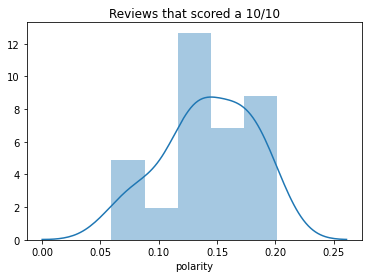

In [16]:
# examine the highest polarities and highest scores
high_scores_df = ign_df.loc[ign_df['review_score_float']==10.0]
low_scores_df = ign_df.loc[ign_df['review_score_float']<3.0]

print(low_scores_df.shape)
print(high_scores_df.shape)
# high_scores_df
sns.distplot(high_scores_df['polarity'])
plt.title('Reviews that scored a 10/10')
plt.savefig(photo_dir+'polarity_hist_score_10.jpg', dpi=200)
plt.show()

sns.distplot(low_scores_df['polarity'])
plt.title('Reviews that scored <= 3/10')
plt.savefig(photo_dir+'polarity_hist_low_score.jpg', dpi=200)
plt.show()

In [17]:
review_score_midpoints = [(0.5+x) for x in range(1,9)]

ign_array_dfs = [ign_df.loc[(ign_df['review_score_float']>=x-0.5) & 
                                      (ign_df['review_score_float']<x+0.5) ] 
                  for x in review_score_midpoints ]
# picking up the edge case
review_score_midpoints.append(9.5)
ign_array_dfs.append(ign_df.loc[(ign_df['review_score_float']>=9.0) & 
                                      (ign_df['review_score_float']<=10)] )

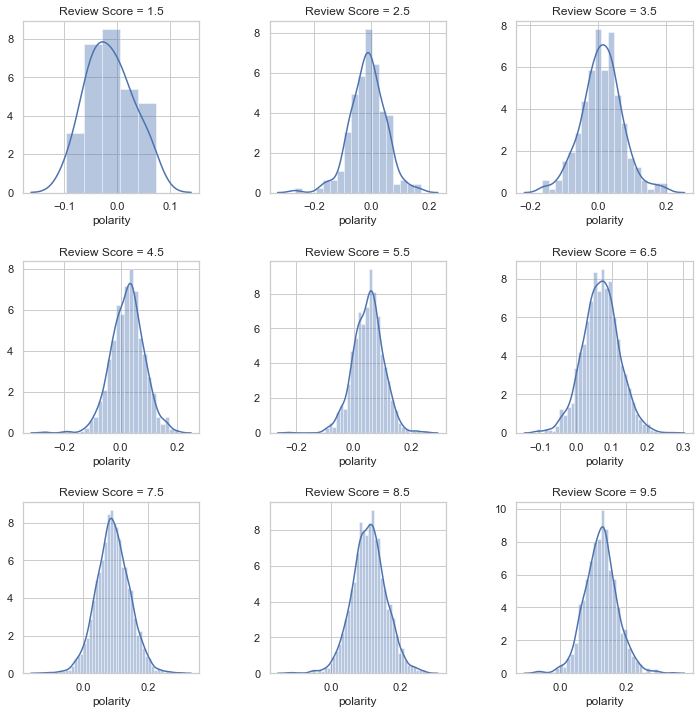

In [58]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0,len(review_score_midpoints)):
    ax = fig.add_subplot(3,3,i+1)
    plt.title('Review Score = {}'.format(review_score_midpoints[i]))
    sns.distplot(ign_array_dfs[i]['polarity'])
#     plt.xticks(np.arange(-0.2,0.2,0.1))
plt.savefig(photo_dir+'review_score_polarity_hists_cuts.jpg', dpi=400)

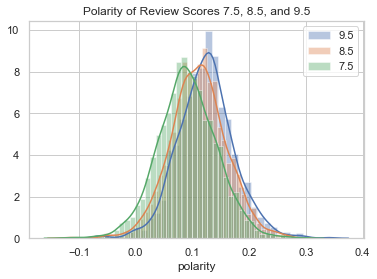

In [57]:
sns.distplot(ign_array_dfs[8]['polarity'], label='9.5')
sns.distplot(ign_array_dfs[7]['polarity'], label='8.5')
sns.distplot(ign_array_dfs[6]['polarity'], label='7.5')
plt.title('Polarity of Review Scores 7.5, 8.5, and 9.5')
plt.legend()
plt.savefig(photo_dir+'polarity_comparison_of_several_scores.jpg', dpi=200)
plt.show()

sns.distplot(ign_array_dfs[8]['polarity'], label='9.5')
sns.distplot(ign_array_dfs[0]['polarity'], label='1.5')
plt.title('Polarity of Review Scores 9.5 and 1.5')
plt.legend()
plt.savefig(photo_dir+'polarity_comparison_high_low_score.jpg', dpi=200)
plt.show()

In [20]:
ign_polarity_means = [pd.DataFrame.mean(x['polarity']) for x in ign_array_dfs]
ign_polarity_std = [pd.DataFrame.std(x['polarity']) for x in ign_array_dfs]

# ign_polarity_std[0] = 1
print(ign_polarity_means)
print(ign_polarity_std)

[-0.014205834903489449, -0.013088817993395759, 0.011000493815820413, 0.024038108296392448, 0.050931024407782535, 0.06994867456614749, 0.09131422942319456, 0.1106285007817424, 0.12343991004905958]
[0.04341439069502324, 0.06136837585609959, 0.05995391832642983, 0.05733240151759401, 0.0517759210801954, 0.05078631315832945, 0.051632144622981525, 0.04998389256682129, 0.04952256887126148]


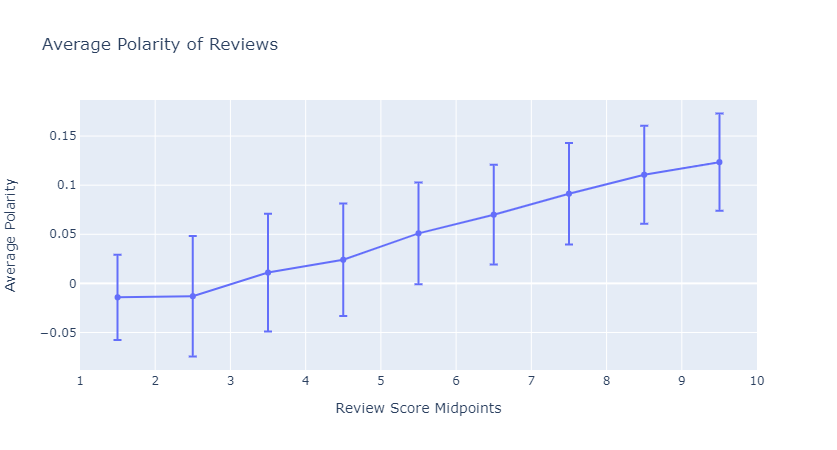

In [21]:
fig = go.Figure(data=go.Scatter(x=review_score_midpoints, 
                                y=ign_polarity_means, 
                                error_y=dict(type='data', 
                                             array=ign_polarity_std)))
fig.update_layout(title='Average Polarity of Reviews', 
                  xaxis_title='Review Score Midpoints', yaxis_title='Average Polarity')
fig.update_xaxes(dtick=1.0)
fig.write_image(photo_dir+'avg_polarity_reviews.jpg', scale=2.0)
fig.show()

# Exploring Polarity further
So it could be the case that maybe how subjective a review is is indicative of how strong of an affect the polarity is on the review score (i.e. a less subjective review would have review scores that more strongly reflect the polarity of the review)

## Further question
Does a lower subjectivity restrict the spread in scores based on polarity?

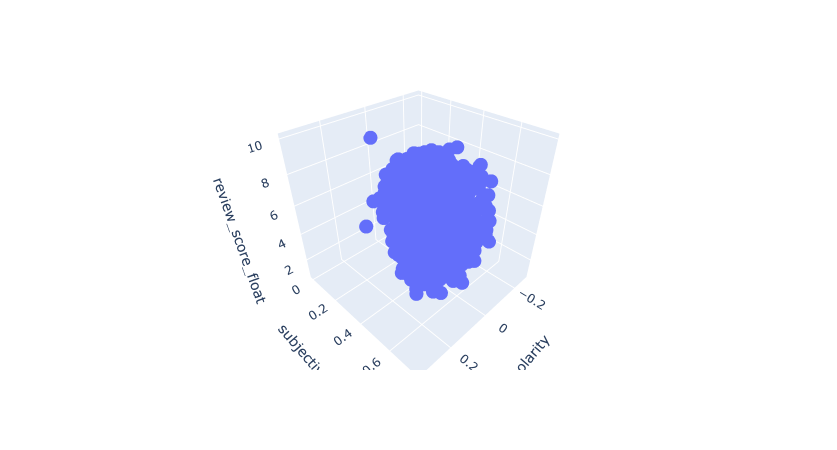

In [22]:
fig = px.scatter_3d(x='polarity', y='subjectivity', z='review_score_float', data_frame=ign_df)
fig.show()

## Not too revealing, so let's try cuts in subjectivity

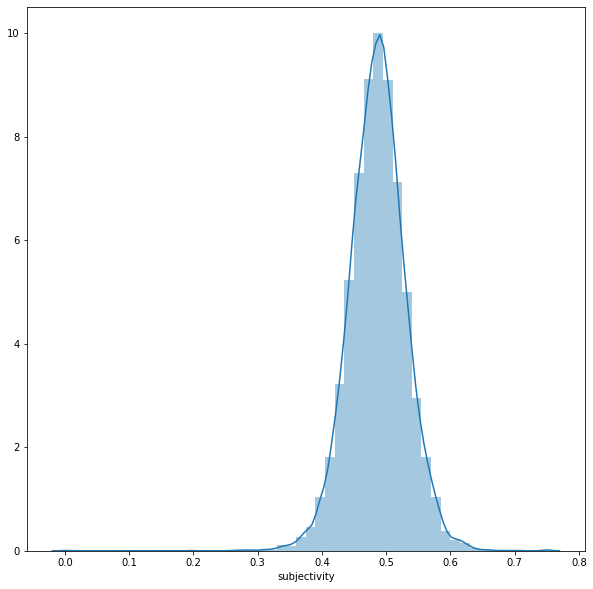

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(ign_df['subjectivity'])
plt.show()

In [24]:
ign_df.describe()

review_score_float  number_character_review  number_words_review  \
count        11072.000000             11072.000000         11072.000000   
mean             7.008011              6001.000090          1041.775650   
std              1.671266              3556.818591           616.203171   
min              0.800000                 3.000000             3.000000   
25%              6.000000              3563.000000           631.000000   
50%              7.400000              5123.000000           885.000000   
75%              8.200000              7467.250000          1284.000000   
max             10.000000             36694.000000          6215.000000   

           polarity  subjectivity  
count  11072.000000  11072.000000  
mean       0.083117      0.486730  
std        0.061378      0.043808  
min       -0.270000      0.000000  
25%        0.045420      0.459187  
50%        0.085253      0.487145  
75%        0.123853      0.513698  
max        0.340038      0.750000

In [25]:
low_sub_df = ign_df.loc[ign_df['subjectivity']<0.4]
high_sub_df = ign_df.loc[ign_df['subjectivity']>0.57]
print(low_sub_df.shape, high_sub_df.shape)

(278, 19) (318, 19)


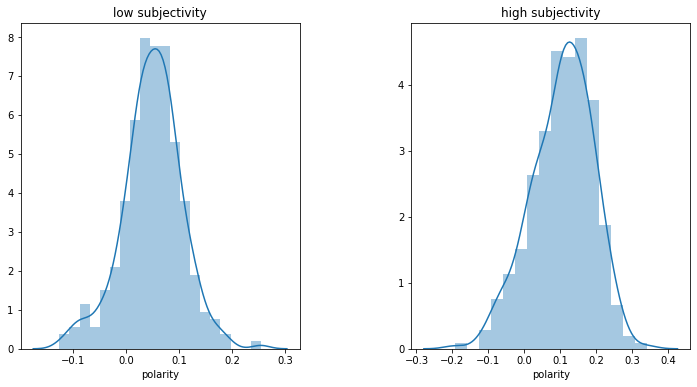

In [26]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1,2,1)
plt.title('low subjectivity')
sns.distplot(low_sub_df['polarity'])
ax = fig.add_subplot(1,2,2)
plt.title('high subjectivity')
sns.distplot(high_sub_df['polarity'])
plt.savefig(photo_dir+'polarity_hist_by_subj.jpg', dpi=400)
plt.show()

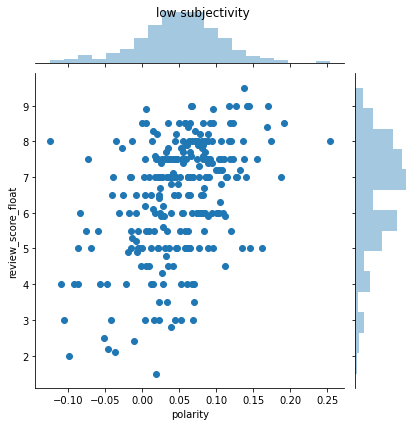

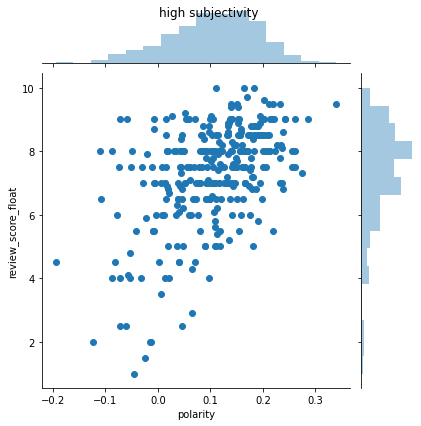

In [27]:
# fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(1,2,1)
plot1 = sns.jointplot(x='polarity', y='review_score_float', data=low_sub_df)
plot1.fig.suptitle('low subjectivity')
# plt.title('low subjectivity')
plt.savefig(photo_dir+'score_polarity_by_low_scatter.jpg', dpi=200)
plt.show()
# ax = fig.add_subplot(1,2,2)
plot2 = sns.jointplot(x='polarity', y='review_score_float', data=high_sub_df)
plot2.fig.suptitle('high subjectivity')
# plt.title('high subjectivity')
plt.savefig(photo_dir+'score_polarity_by_high_subj.jpg', dpi=200)
plt.show()

So the idea that subjectivity might be some measure of 'elasticity' of a review score isn't looking too great, but let's examine some score slices to be sure

In [28]:
lowsub_78_df = low_sub_df.loc[(low_sub_df['review_score_float']>=7.0) & 
                              (low_sub_df['review_score_float']<=8.0)]
highsub_78_df = high_sub_df.loc[(high_sub_df['review_score_float']>=7.0) & 
                              (high_sub_df['review_score_float']<=8.0)]

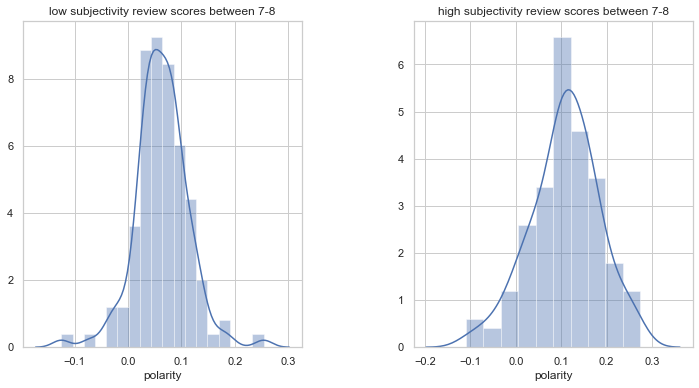

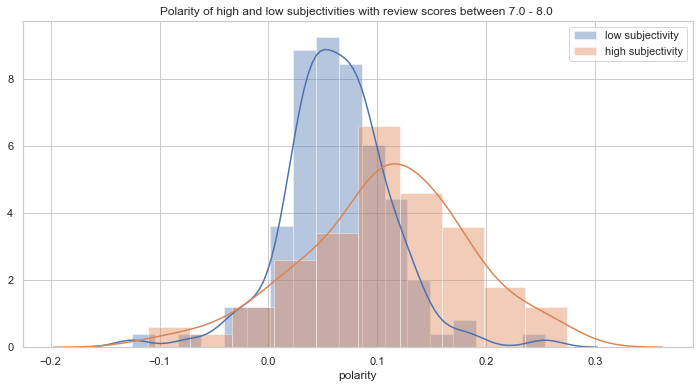

In [65]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1,2,1)
plt.title('low subjectivity review scores between 7-8')
sns.distplot(lowsub_78_df['polarity'])
ax = fig.add_subplot(1,2,2)
plt.title('high subjectivity review scores between 7-8')
sns.distplot(highsub_78_df['polarity'])
plt.savefig(photo_dir+'polar_hist_high_and_low_separate_plots.jpg', dpi=400)
plt.show()

fig = plt.figure(figsize=(12,6))
hist1 = sns.distplot(lowsub_78_df['polarity'], label='low subjectivity')
hist2 = sns.distplot(highsub_78_df['polarity'], label='high subjectivity')
plt.title('Polarity of high and low subjectivities with review scores between 7.0 - 8.0 ')
plt.legend()
plt.savefig(photo_dir+'polarity_hist_high_low_same_plot.jpg', dpi=200)
plt.show()

So, it doesn't really look like there's a distinct difference between high and low subjectivity, but let's try a few more bins

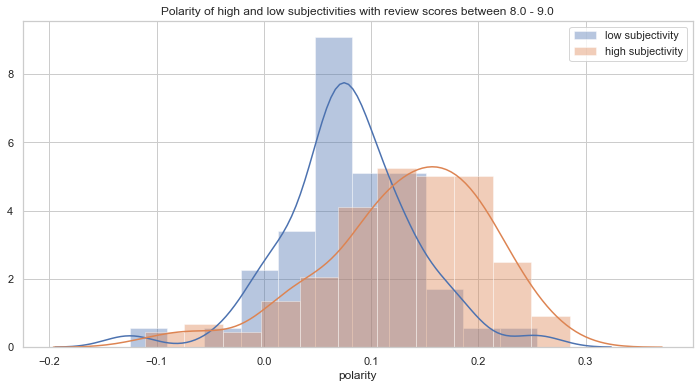

In [63]:
lowcut = 8.0
highcut = 1.0 + lowcut

lowsub_scorecut_df = low_sub_df.loc[(low_sub_df['review_score_float']>=lowcut) & 
                              (low_sub_df['review_score_float']<=highcut)]
highsub_scorecut_df = high_sub_df.loc[(high_sub_df['review_score_float']>=lowcut) & 
                              (high_sub_df['review_score_float']<=highcut)]

fig = plt.figure(figsize=(12,6))
hist1 = sns.distplot(lowsub_scorecut_df['polarity'], label='low subjectivity')
hist2 = sns.distplot(highsub_scorecut_df['polarity'], label='high subjectivity')
plt.title('Polarity of high and low subjectivities with review scores between {} - {}'.format(lowcut,highcut))
plt.legend()
plt.savefig(photo_dir+'polarity_hist_high_low_same_plot_8_9.jpg', dpi=200)
plt.show()

Before I leave this topic, I should look at the relationship between number of words, polarity, and review score, since both of those have some correlation to review score

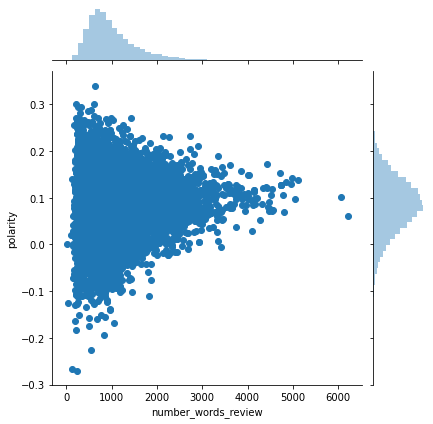

In [31]:
sns.jointplot(x='number_words_review', y='polarity', data=ign_df)

No real correlation here, so that will help with any cuts if we wanted to make them

In [32]:
fig = px.scatter_3d(x='polarity', y='number_words_review', z='review_score_float', data_frame=ign_df)
fig.show()

The plot shows some structure, but it's likely not enough to get nice separation. 

I already have the ign_array_dfs, might as well use them again

9
9


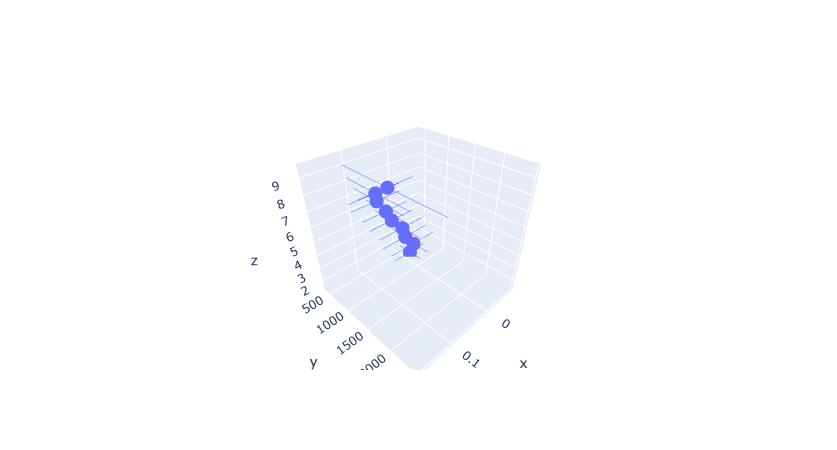

In [33]:
ign_word_means = [pd.DataFrame.mean(x['number_words_review']) for x in ign_array_dfs]
ign_word_std = [pd.DataFrame.std(x['number_words_review']) for x in ign_array_dfs]

# ign_polarity_means = [pd.DataFrame.mean(x['polarity']) for x in ign_array_dfs]
# ign_polarity_std = [pd.DataFrame.std(x['polarity']) for x in ign_array_dfs]
# print(review_score_midpoints)
print(len(ign_word_std))
print(len(ign_polarity_std))
# go.Scatter3d()
fig = go.Figure(data=go.Scatter3d(x=ign_polarity_means, y=ign_word_means, z=review_score_midpoints, 
                                   error_x=dict(type='data', array=ign_polarity_std), 
                                   error_y=dict(type='data', array=ign_word_std) ) )
# fig.update_layout(title='Stuff', 
#                   xaxis_title= 'average polarity', 
#                   yaxis_title='average number of words', 
#                   zaxis_title='review score midpoint')
fig.show()

In [34]:
# save some of the changes made to the data
ign_df.to_pickle('ign_data/ign_data_pass_three.pkl')

So, while a cool plot, doesn't really reveal anything except that I really can't tell what's happening. While there is some kind of correlation, the spread of values is too large

# Next thing
Should examine polarity/subjectivity as a function of fraction of the review. So plot sentiment sentence by sentence essentially

Should also check number of positive and negative words as a whole number, and fraction of total words, and can begin making cuts on number of polar words above/below some polar number

# Run Again, but different
TextBlob can have different text analyzers, and I used the default one above. Another one might be the NaiveBayesAnalyzer that was trained on a movie review corpus (https://textblob.readthedocs.io/en/dev/advanced_usage.html#sentiment-analyzers).

It would be interesting to see how much the results change just due to this.

# Do linear ML models, and some bayesian stuff here

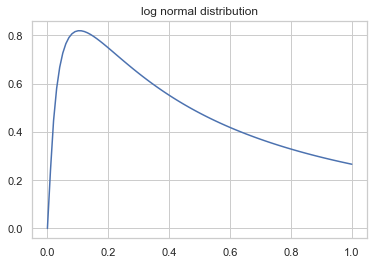

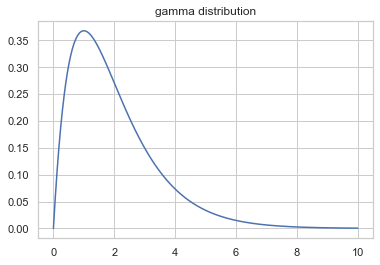

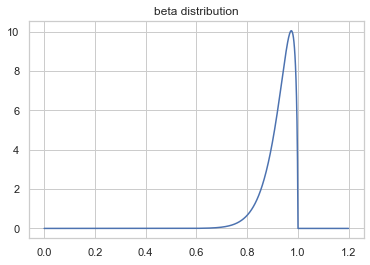

In [35]:
sns.set(style='whitegrid')
s = 1.5 # changes peak shape, probably to 
x = np.linspace(start=0, stop=1, num=100)
y = scipy.stats.lognorm.pdf(x, s)
plt.plot(x,y)
plt.title('log normal distribution')
plt.show()

a = 2
x_gamma = np.linspace(start=0, stop=10, num=1000)
y_gamma = scipy.stats.gamma.pdf(x_gamma, a)
plt.plot(x_gamma,y_gamma)
plt.title('gamma distribution')
plt.show()

a_beta = 20
b_beta = 1.5
x_beta = np.linspace(start=0, stop=1.2, num=1200)
y_beta = scipy.stats.beta.pdf(x_beta, a=a_beta, b=b_beta)
plt.plot(x_beta, y_beta)
plt.title('beta distribution')
plt.show()

In [36]:
ign_df.head()

links  \
1  https://www.ign.com/articles/2011/07/19/warham...   
2  https://www.ign.com/articles/2011/07/20/call-o...   
3  https://www.ign.com/articles/2011/07/20/captai...   
4  https://www.ign.com/articles/2011/07/20/quiz-c...   
5  https://www.ign.com/articles/2011/07/20/limbo-...   

                                   rough_review_body  \
1  \u003csection class=\"article-page\"\u003e\u00...   
2  \u003csection class=\"article-page\"\u003eThe ...   
3  \u003csection class=\"article-page\"\u003eThe ...   
4  \u003csection class=\"article-page\"\u003e\u00...   
5  \u003csection class=\"article-page\"\u003eVide...   

                                 cleaned_review_body  \
1     'Warhammer 40K: Kill Team might be unfortun...   
2   The Call of Juarez franchise always intereste...   
3   The majority of movie games are just awful. S...   
4     'Quiz Climber, from Buzz! developer   'Rele...   
5   Video games are an art form made up of visual...   

                                review_summary_rough review_score  \
1  "And \"also-ran\" hangs all over Warhammer 40K...          6.5   
2  "Call of Juarez: The Cartel is a poor change o...          4.5   
3  "Captain America: Super Soldier is a mediocre ...          5.5   
4  "Ultimately, Quiz Climber is just a little too...          6.5   
5  "Limbo is an incredible achievement. Very few ...            9   

                                                tags  \
1  :["review","blogroll","event-essentials","hot"...   
2  :["review","blogroll","call-of-juarez-the-cart...   
3  :["review","blogroll","legacy","wii","games","...   
4  :["review","blogroll","games","legacy","wirele...   
5  :["review","games","legacy","limbo","platforme...   

                               categories             modified_date  \
1  :["ign","ps3","xbox-360","xbox-live"],  2011-10-18T05:59:32+0000   
2         :["ign","pc","ps3","xbox-360"],  2011-10-18T06:02:02+0000   
3                         :["ign","wii"],  2011-10-18T06:02:20+0000   
4                    :["ign","wireless"],  2011-10-18T06:07:06+0000   
5                          :["pc","ps3"],  2011-10-18T06:07:21+0000   

             published_date         author_name  \
1  2011-07-19T19:47:00+0000       "Arthur Gies"   
2  2011-07-20T00:14:00+0000  "Anthony Gallegos"   
3  2011-07-20T00:43:00+0000      "Audrey Drake"   
4  2011-07-20T21:44:00+0000      "Justin Davis"   
5  2011-07-20T22:29:00+0000   "Daemon Hatfield"   

                                            tag_list  \
1  [review, blogroll, event-essentials, hot, lega...   
2  [review, blogroll, call-of-juarez-the-cartel, ...   
3  [review, blogroll, legacy, wii, games, captain...   
4  [review, blogroll, games, legacy, wireless, qu...   
5  [review, games, legacy, limbo, platformer, pla...   

                     categories_list  \
1  [ign, ps3, xbox-360, xbox-live, ]   
2         [ign, pc, ps3, xbox-360, ]   
3                       [ign, wii, ]   
4                  [ign, wireless, ]   
5                        [pc, ps3, ]   

                                  review_title  \
1            "Warhammer 40K: Kill Team Review"   
2          "Call of Juarez: The Cartel Review"   
3  "Captain America: Super Soldier Wii Review"   
4                        "Quiz Climber Review"   
5                               "Limbo Review"   

                                  review_body_corpus  review_score_float  \
1     warhammer 40k kill team might be unfortunat...                 6.5   
2   the call of juarez franchise always intereste...                 4.5   
3   the majority of movie games are just awful st...                 5.5   
4     quiz climber from buzz developer   relentle...                 6.5   
5   video games are an art form made up of visual...                 9.0   

   number_character_review  number_words_review  polarity  subjectivity  
1                     3705                  642  0.062923      0.433371  
2                     3770                  648 -0.016471      0.4

In [37]:
# creating data for linear models
ml_data = ign_df[['number_words_review', 'polarity', 'subjectivity']].values
ml_targets = ign_df[['review_score_float']].values
print(ml_data)
print(ml_targets)

[[ 6.42000000e+02  6.29230308e-02  4.33370770e-01]
 [ 6.48000000e+02 -1.64710097e-02  4.57897928e-01]
 [ 4.74000000e+02 -3.84188366e-03  5.44457798e-01]
 ...
 [ 9.27000000e+02  2.47258297e-02  5.00414863e-01]
 [ 1.67400000e+03  1.83113416e-01  5.57906161e-01]
 [ 1.77300000e+03  1.39556127e-01  5.14561538e-01]]
[[6.5]
 [4.5]
 [5.5]
 ...
 [5. ]
 [8. ]
 [8. ]]


In [38]:
test_size = 0.2
data_train, data_validation, target_train, target_validation = train_test_split(ml_data, 
                                                                                ml_targets/10.0, 
                                                                                test_size=test_size, 
                                                                                random_state=42)

In [39]:
generalized_poisson_reg = TweedieRegressor(power=1, link='log')
generalized_gamma_reg = TweedieRegressor(power=2, link='log')
clf = tree.DecisionTreeRegressor()
bayesian_ridge = linear_model.BayesianRidge()

In [40]:
generalized_poisson_reg.fit(data_train, target_train)
generalized_gamma_reg.fit(data_train, target_train)
clf.fit(data_train, target_train)
bayesian_ridge.fit(data_train, target_train)

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

overflow encountered in multiply

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning:

invalid value encountered in add

C:\Users\TerrenceJEdmonds\Anaconda3\lib\

BayesianRidge()

In [50]:
gpr_predictions = generalized_poisson_reg.predict(data_validation)
ggr_predictions = generalized_gamma_reg.predict(data_validation)
decision_tree_predictions = clf.predict(data_validation)
bayesian_ridge_predictions = bayesian_ridge.predict(data_validation)

print(mean_squared_error(y_pred=gpr_predictions, y_true=target_validation))
print(mean_squared_error(y_pred=ggr_predictions, y_true=target_validation))
print(mean_squared_error(y_pred=decision_tree_predictions, y_true=target_validation))
print()
print(mean_squared_error(y_pred=bayesian_ridge_predictions, y_true=target_validation))
print(mean_absolute_error(y_pred=bayesian_ridge_predictions, y_true=target_validation))

0.025983389055548877
0.025983389055548877
0.034601173814898425

0.016880410433633936
0.10288587295311034


In [42]:
# looking at 
gradient_tree = GradientBoostingRegressor(n_estimators=10, 
                                          learning_rate=0.2, 
                                          max_depth=5, 
                                          random_state=0, 
                                          loss='ls').fit(data_train, target_train)

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [49]:
grad_tree_predictions = gradient_tree.predict(data_validation)

print(mean_squared_error(y_pred=grad_tree_predictions, y_true=target_validation))
print(mean_absolute_error(y_pred=grad_tree_predictions, y_true=target_validation))

0.016620081921113028
0.1020603695616579


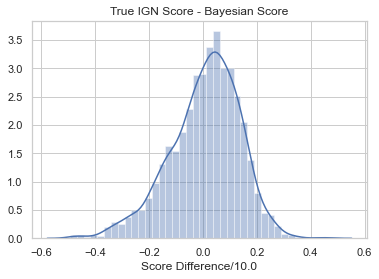

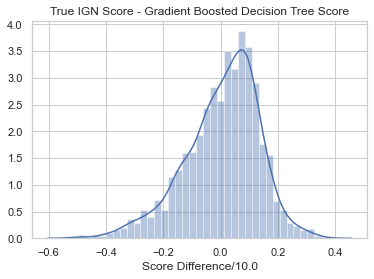

In [66]:
bayes_ridge_difference = target_validation[:,0] - bayesian_ridge_predictions
grad_tree_difference = target_validation[:,0] - grad_tree_predictions

# print(bayesian_ridge_predictions)
# print(target_validation)

sns.distplot(bayes_ridge_difference, axlabel='Score Difference/10.0')
plt.title('True IGN Score - Bayesian Score')
plt.savefig(photo_dir+'bayesian_score_difference.jpg', dpi=200)
plt.show()

sns.distplot(grad_tree_difference, axlabel='Score Difference/10.0')
plt.title('True IGN Score - Gradient Boosted Decision Tree Score')
plt.savefig(photo_dir+'gbdt_difference.jpg', dpi=200)
plt.show()

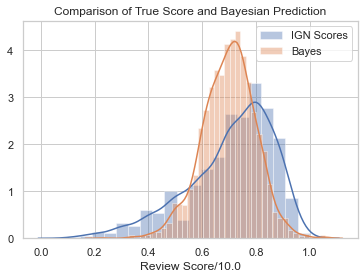

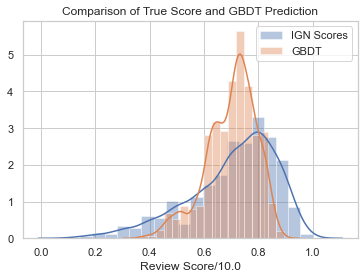

In [70]:
sns.distplot(target_validation, label='IGN Scores', bins=20)
sns.distplot(bayesian_ridge_predictions, label='Bayes', axlabel='Review Score/10.0')
plt.title('Comparison of True Score and Bayesian Prediction')
plt.legend()
plt.savefig(photo_dir+'bayesian_score_prediction.jpg', dpi=200)
plt.show()

sns.distplot(target_validation, label='IGN Scores', bins=20)
sns.distplot(grad_tree_predictions, label='GBDT', bins=18, axlabel='Review Score/10.0')
plt.title('Comparison of True Score and GBDT Prediction')
plt.legend()
plt.savefig(photo_dir+'gbdt_prediction.jpg', dpi=200)
plt.show()

# Just looking at some clean up stuff for the presentation

In [55]:
# ign_df.head()
loc=1001
print(ign_df['rough_review_body'].loc[loc])

\u003csection class=\"article-page\"\u003e\u003ca class='autolink' href='https://ps3.ign.com/objects/035/035867.html'\u003eFist of the North Star: Ken's Rage\u003c/a\u003e is all about punching people. You just march through levels punching the hell out of everyone. That's it. If that sounds cool to you, have fun. If it doesn't, keep looking. \u003csection data-transform=\"mobile-ad-break\"\u003e\u003c/section\u003e  \u003cbr /\u003e Of course, the punching thing is boiling Fist of the North Star: Ken's Rage down to its most basic component. Stacked on top of the punching is a story of punching. Based on a manga series, North Star lets you play as a bunch of characters, but the main dude is Kenshiro. After nuclear war scorched the Earth, pockets of humanity have risen up in Mad Max fashion and ride motorcycles across the wasteland starting crap. Kenshiro is out there searching for his fiancé and revenge...I think. If you're not a fan of the series, the story isn't really presented in a

In [56]:
print(ign_df['cleaned_review_body'].loc[loc])

   'Fist of the North Star: Ken's Rage is all about punching people. You just march through levels punching the hell out of everyone. That's it. If that sounds cool to you, have fun. If it doesn't, keep looking.     Of course, the punching thing is boiling Fist of the North Star: Ken's Rage down to its most basic component. Stacked on top of the punching is a story of punching. Based on a manga series, North Star lets you play as a bunch of characters, but the main dude is Kenshiro. After nuclear war scorched the Earth, pockets of humanity have risen up in Mad Max fashion and ride motorcycles across the wasteland starting crap. Kenshiro is out there searching for his fiancé and revenge...I think. If you're not a fan of the series, the story isn't really presented in any kind of understandable way in the game. You start at the end, get kicked back to the beginning where you were thirsty, and then things just keep going.     \"ignvideo\" \"fist-of-the-north-star-to-serve-and-pummel-gamep